![Imgur](https://i.imgur.com/N8ETwjW.png 'Header')

**RMS Titanic** was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.

### Hypothesis:
As I remember from the movie titanic, after the crash, priority was given to females and children to fill the lifeboats however I assume that's the not only case. My main assumption for this research is that the passenger's class location had the biggest influence on the outcome if he or she survived. Higher the class closer the passenger would have been located to the deck, thus front row in the line for the lifeboats. Also, the actual fare passenger paid will not correlate with the chances of survival, hearsay the higher fare doesn't necessarily mean that passenger was in the better class.

-----
<img style="float: left;" src="https://i.imgur.com/Mnrrfx9.png">

The ship once proclaimed as 'unsinkable' bears one of the most profound tragedies. For the Kaggle challenge, we have the data of the passengers on the ship. Data is split into halves for the train-set and for test-set. Our goal is to build the model which will predict survivability of the passengers based on provided characteristics with the precision of > 80%. We have multiple columns, and our goal is to decide which variables to keep and which variables to drop.

---------
We start by importing all the necessary packages and importing the train set and taking look at the first five rows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---------
<img style="float: left;" src="https://i.imgur.com/ULf7YHt.png">

We start our session by doing the descriptive analysis of our data. Cleaning, wrangling and keeping what we assume would be influential in predicting the outcome.

We check for data types:

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We'll check how many <code>NaN</code> results we have in our data and later we'll decide what to do with them

In [4]:
print("total number of NaN in column 'Age' is:", df['Age'].isna().sum())

total number of NaN in column 'Age' is: 177


We'll count the number of females and number of males in our data

In [5]:
fcount = 0
mcount = 0

for i in df['Sex']:
    if i == 'female':
        fcount +=1
    else:
        mcount +=1
        
print('We have: ', fcount, 'females')
print('We have: ', mcount, 'males')

We have:  314 females
We have:  577 males


We convert <code>'Sex'</code> to dummy variables which will be used for our model; male=0 and female=1

In [6]:
df['Sex'].replace({'female':1, 'male':0}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


We'll look at the number of passengers in each class. Class 1 is a first-class (highest location), 2 is a second-class (middle location), and 3 is a third-class (bottom location)

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<img style="float: left;" src="https://i.imgur.com/rXnNidY.png">

We will create new column which we'll name <code>'Family'</code>. This will be used to determin if person traveled alone or with certain number of family members (Siblinds/Parents). In order to do that we will combine <code>'SibSp'</code> which is the number of siblinds and <code>'Parch'</code> number of parents

In [8]:
df['Family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


Filling 'NaN' values in <code>'Age'</code> column and rounding up to closes integers to reduce minor variability in the data and to round estimated ages (which are float values) in style other ages are entered to keep data consistent

In [9]:
df['Age'].fillna(29, inplace=True) # replace missing values with average age value
df['Age'].apply(np.ceil) # round age up to the closest integer
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.560236,32.204208,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.005010,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000


We have three continiuous explanatory variables <code>'Age'</code>, <code>'Fare'</code> and <code>'Family'</code>. We plan to implement these variables in our model. That's why we will look at their distribution and characteristics.

Text(0, 0.5, 'Frequency')

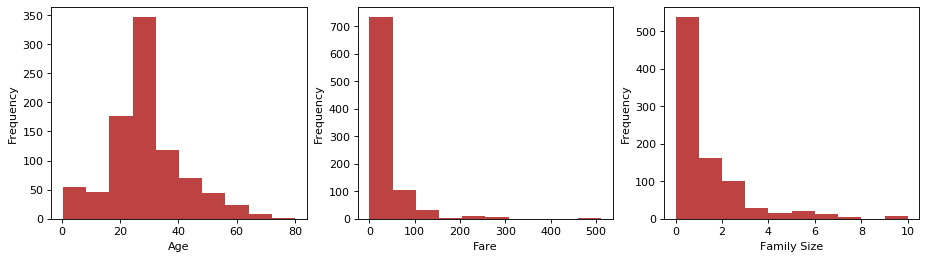

In [10]:
plt.figure(figsize=(14, 3.5), dpi=80)

plt.subplot(1,3,1)
plt.hist(df['Age'], color='firebrick', alpha=.85)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(df['Fare'], color='firebrick', alpha=.85)
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(df['Family'], color='firebrick', alpha=.85)
plt.xlabel('Family Size')
plt.ylabel('Frequency')

* We see that only <code>'Age'</code> is more or less normally distributed and we'll keep it that way

* Fare is skewed to the left with a substantial difference in each bin. We know that <code>'Fare'</code> represents currency - the amount paid for the ticket - thus we will convert it by taking **ln** of the variable to use it as a percentage change, thus normalizing its distribution

* <code>'Family'</code> is also skewed to the left but the difference between the minimum and the maximum value is marginal thus we'll keep it that way

----
We'll create two dummy variables for the second and third classes from the <code>'Pclass'</code>, treating the first class as the base for our model. However, we'll still keep <code>'Pclass'</code> which will be used for pivot tables and data visualization

In [11]:
cclass = pd.get_dummies(pd.Series(list(df['Pclass'])), drop_first=True)
cclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [12]:
df = pd.concat([df, cclass], axis=1)
df.rename(columns={2: 'SecondClass', 3: 'ThirdClass'},inplace=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,SecondClass,ThirdClass
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.00,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.00,B42,S,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,W./C. 6607,23.45,NaN,S,3,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.00,C148,C,0,0,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,370376,7.75,NaN,Q,0,0,1


In [13]:
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

df = df.set_index('PassengerId')
df.head(5)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,SecondClass,ThirdClass
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,1,0,0
5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,0,0,1


In [14]:
df.tail(5)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,SecondClass,ThirdClass
PassengerId,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",0,27.0,13.00,S,0,1,0
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,30.00,S,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,23.45,S,3,0,1
890,1,1,"Behr, Mr. Karl Howell",0,26.0,30.00,C,0,0,0
891,0,3,"Dooley, Mr. Patrick",0,32.0,7.75,Q,0,0,1


----------
<img style="float: left;" src="https://i.imgur.com/DemYpQE.png">

## Observe by pivot tables

Now we start observing probabilities based on various categories.

* First, we will look at the probability to survive the crash based on the class passenger was suited.

* Second, we will observe survivability based on gender

* Third, based on the effect of the family size present on the ship

* Fourth, we will divide passengers into age groups and observe at the probability of survival

#### Passengers Class and Survival Probability:

In [15]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


* If a passenger was in a first-class there was a ~70% surviving, 50% if a passenger was in the 2nd class and only 24% change if they were in the third class. Unfortunately, as we saw in a previous section third class was the class, where the majority of the travelers were located.

#### Passengers Sex and Survival Probability:

In [16]:
df1 = df.copy()
df1['Sex'].replace({1:'Female', 0:'Male'}, inplace=True)
df1[['Sex', 'Survived']].groupby(['Sex'],
                                as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
Female,0.742038
Male,0.188908


* Bad news for males. The probability of surviving if you were male was only 19%. This was expected as if you remember there was a rule that females and babies went first in the rescue boats.

#### Passengers Family Size and Survival Probability:

In [17]:
df[['Family', 'Survived']].groupby(['Family'],
                                   as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


* Here we have an odd situation where somehow if you were traveling with three family members chance of surviving is 72%. This can be just as a matter of chance, but we still need to include in our model to control for any controllable bias, even if it's by just a matter of chance

#### Passengers Age Group and Survival Probability:
We'll group ages by 10-year increments for a table, which will give us seven bins

In [18]:
# group ages based on 10 year increments for a table
bins = [0, 10, 20, 30, 40, 50, 60, 90]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_gr'] = pd.cut(df1.Age, bins, labels = labels, include_lowest = True)

df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,SecondClass,ThirdClass,Age_gr
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,1,0,1,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,1,0,0,30-39
3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,0,0,1,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,1,0,0,30-39
5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,0,0,1,30-39


In [19]:
df[['Age_gr', 'Survived']].groupby(['Age_gr'],
                                as_index=True).mean().sort_values(by='Age_gr', ascending=True)

,Survived
Age_gr,
0-9,0.593750
10-19,0.382609
20-29,0.334152
30-39,0.445161
40-49,0.383721
50-59,0.404762
60+,0.227273


----------
<img style="float: left;" src="https://i.imgur.com/7oKFkBF.png">

We import matplotlib libraries

In [20]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
print('Matplotlib imported!')

Matplotlib imported!


Cleaning <code>'Fare'</code> data for this section

In [21]:
df['Fare'] = df['Fare'].replace(0, np.nan)
df['Fare'] = df['Fare'].dropna(how='all', axis=0)
print((df['Fare'] == 0).sum())
df.tail()

0


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,SecondClass,ThirdClass,Age_gr
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",0,27.0,13.00,S,0,1,0,20-29
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,30.00,S,0,0,0,10-19
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,23.45,S,3,0,1,20-29
890,1,1,"Behr, Mr. Karl Howell",0,26.0,30.00,C,0,0,0,20-29
891,0,3,"Dooley, Mr. Patrick",0,32.0,7.75,Q,0,0,1,30-39


We'll create two data sets, one for female passengers and one for male passengers as they will be visualized separately to better see the effect of gender and their subsequent probabilities

In [22]:
female = df[['Sex', 'Age', 'Fare', 'Survived', 'Family']].loc[df['Sex'] == 1]
male = df[['Sex', 'Age', 'Fare', 'Survived', 'Family']].loc[df['Sex'] == 0]
female.describe()

,Sex,Age,Fare,Survived,Family
count,314.0,314.000000,314.000000,314.000000,314.000000
mean,1.0,28.098726,44.479818,0.742038,1.343949
std,0.0,12.866582,57.997698,0.438211,1.755733
min,1.0,0.750000,6.750000,0.000000,0.000000
25%,1.0,21.000000,12.071875,0.000000,0.000000
50%,1.0,29.000000,23.000000,1.000000,1.000000
75%,1.0,35.000000,55.000000,1.000000,2.000000
max,1.0,63.000000,512.329200,1.000000,10.000000


Previously we looked at the distribution of the <code>'Age'</code>, <code>'Fare'</code> and <code>'Family'</code> in combination for both genders.
Now we'll separate them based on gender, but now using the k-density graph for distribution instead of the histogram

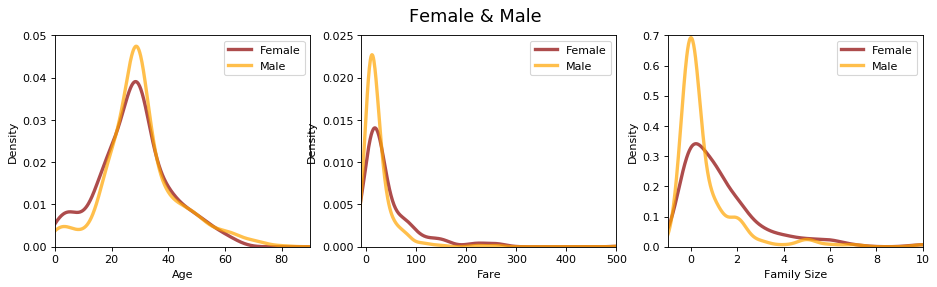

In [23]:
plt.figure(figsize=(14, 3.5), dpi=80)
plt.suptitle('Female & Male', fontsize=16)
labels='Female','Male'

plt.subplot(1, 3, 1)
female['Age'].plot(kind='density', linewidth=3, alpha=.7, color='darkred')
male['Age'].plot(kind='density', linewidth=3, alpha=.7, color='orange')
plt.xlim(0, 90)
plt.ylim(0, 0.05)
plt.xlabel('Age')
plt.legend(labels)

plt.subplot(1, 3, 2)
female['Fare'].plot(kind='density', alpha=.7, color='darkred', linewidth=3)
male['Fare'].plot(kind='density', alpha=.7, color='orange', linewidth=3)
plt.xlim(-10, 500)
plt.ylim(0, .025)
plt.xlabel('Fare')
plt.legend(labels)

plt.subplot(1, 3, 3)
female['Family'].plot(kind='density', alpha=.7, color='darkred', linewidth=3)
male['Family'].plot(kind='density', alpha=.7, color='orange', linewidth=3)
plt.xlim(-1, 10)
plt.ylim(0, .7)
plt.xlabel('Family Size')
plt.legend(labels)

Next, we look at the survivability based on Fare paid in each class for each gender. <code>'Fare'</code> data is represented in the log form for a better scaling

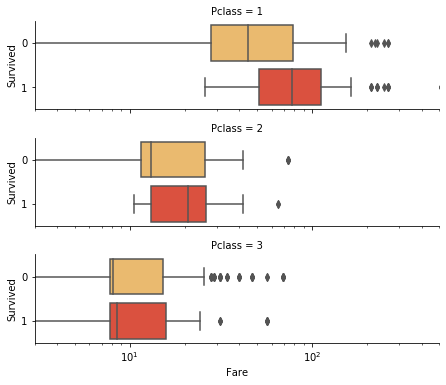

In [24]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass", kind='box', palette='YlOrRd',
                orient="h", height=1.8, aspect=3.5, hue_order='Ascending',
                data=df1)
g.set(xscale='log')
g.set(xlim=(3, 500))

We plot the boxplot again but this time for the <code>'Age'</code> variable

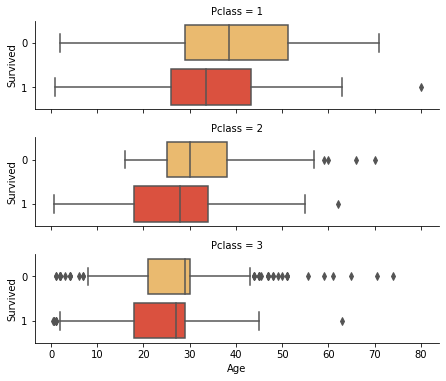

In [25]:
h = sns.catplot(x="Age", y="Survived", row="Pclass", kind='box', palette='YlOrRd',
                orient="h", height=1.8, aspect=3.5, hue_order='Ascending',
                data=df1)


Using a bar chart, we can compare the probability to survive in each class based on the age group

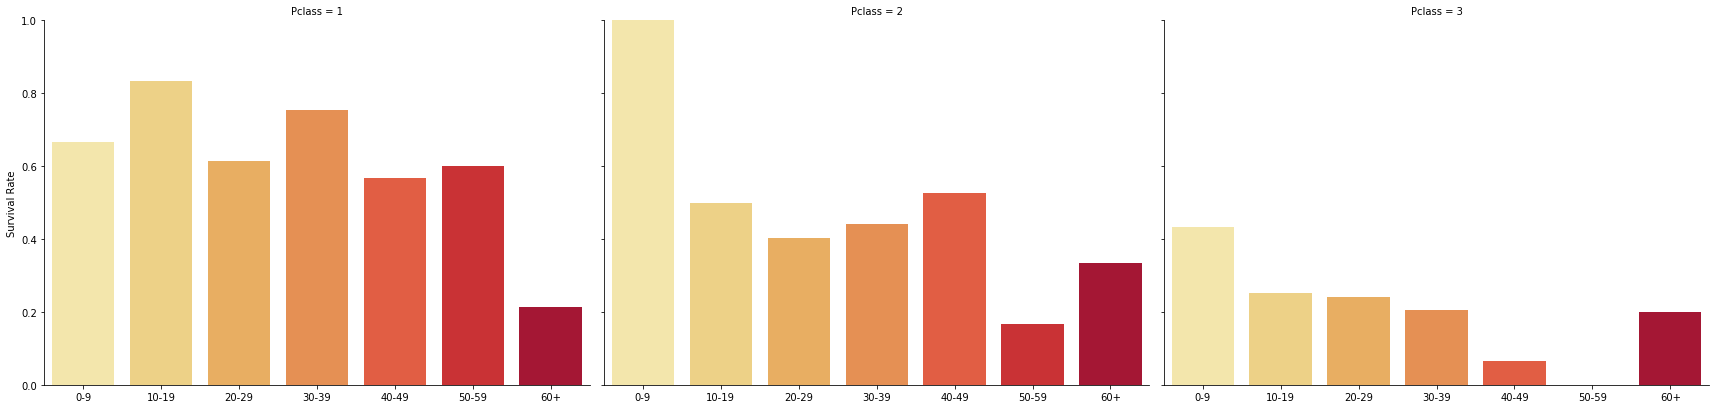

In [26]:
f = sns.catplot(x="Age_gr", y="Survived", col="Pclass", palette='YlOrRd',
                data=df, kind="bar", ci=None, height=6, aspect=1.33)
f.set_axis_labels('', 'Survival Rate')
f.set(ylim=(0,1))

----------
<img style="float: left;" src="https://i.imgur.com/QP6dM4K.png">

As we have a binary dependent variable which gives only Yes=1, No=0 outcomes, we’ll test some of the explanatory variables and its explanatory power.

Text(0.5, 1.0, 'Logistic Model')

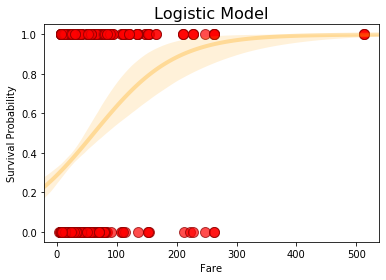

In [27]:
aw = sns.regplot(x='Fare', y='Survived', data=df, logistic=True,
                 line_kws={"color":"orange","alpha":0.3,"lw":4},
                 scatter_kws={"color":"red", "edgecolor":'darkred', 'alpha':.7, "s":100} )
aw.set_ylabel('Survival Probability')
aw.set_xlabel('Fare')
aw.set_title('Logistic Model',fontsize=16)

* This logit model shows that <code>'Fare'</code> is strongly correlated with survivability, which contradicts the assumption made at the beginning of the research. However, this is not conclusive, this gives an idea of how the model should look like.

Text(0.5, 1.0, 'Logistic Model')

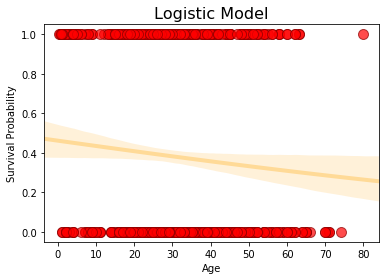

In [28]:
ax = sns.regplot(x='Age', y='Survived', data=df, logistic=True, marker='o', 
                 line_kws={"color":"orange","alpha":0.3,"lw":4},
                 scatter_kws={"color":"red", "edgecolor":'darkred', 'alpha':.7, "s":100} )
ax.set_ylabel('Survival Probability')
ax.set_xlabel('Age')
ax.set_title('Logistic Model',fontsize=16)

* Even though it's not as noticeable as the correlation of the <code>'Fare'</code> trend still appears that as <code>'Age'</code> increases the probability of survival decreases, however, the slope of the regression is nearly flat.

----------
<img style="float: left;" src="https://i.imgur.com/AsArJE1.png">

Importing necessary packages...

In [29]:
# importing necessary packages
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
print('statsmodels imported!')

statsmodels imported!


As mentioned in the beginning, we'll convert <code>'Fare</code> into the ln of Fare and run first **logit regression**

We'll continue adding explanatory variables one by one and later summarize all the models in a table for the comparison and inferences

In [30]:
df['lnFare'] = np.log(df['Fare'])
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,SecondClass,ThirdClass,Age_gr,lnFare
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,1,0,1,20-29,1.981001
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,1,0,0,30-39,4.266662
3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,0,0,1,20-29,2.070022
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,1,0,0,30-39,3.972177
5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,0,0,1,30-39,2.085672


In [31]:
logit1 = smf.logit('Survived ~ Sex + Age', data=df).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.514670
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Jan 2020   Pseudo R-squ.:                  0.2271
Time:                        23:01:49   Log-Likelihood:                -458.57
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.991e-59
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3011      0.218     -5.964      0.000      -1.729      -0.874
Sex            2.5045      0.

In [32]:
logit2 = smf.logit('Survived ~ Sex + Age + lnFare', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.489619
         Iterations 6


In [33]:
logit3 = smf.logit('Survived ~ Sex + Age + lnFare + Family', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.456878
         Iterations 6


In [34]:
logit4 = smf.logit('Survived ~ Sex + Age + lnFare + Family + SecondClass + ThirdClass', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.442372
         Iterations 6


In [35]:
# we build table charachteristics and plug regressions
info_dict={'Pseudo R-squared' : lambda x: f"{x.prsquared:.4f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[logit1, logit2, logit3, logit4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                        'Model 3',
                                        'Model 4'],
                            info_dict=info_dict,)

results_table.add_title('Logit Regressions - Table')

print(results_table)

                 Logit Regressions - Table
                  Model 1    Model 2    Model 3    Model 4  
------------------------------------------------------------
Age              -0.0052    -0.0117*   -0.0303*** -0.0394***
                 (0.0064)   (0.0065)   (0.0075)   (0.0079)  
Family                                 -0.4920*** -0.3024***
                                       (0.0740)   (0.0841)  
Intercept        -1.3011*** -2.9868*** -3.3022*** 0.1808    
                 (0.2182)   (0.3402)   (0.3674)   (0.8680)  
SecondClass                                       -0.8414** 
                                                  (0.3535)  
Sex              2.5045***  2.3387***  2.6562***  2.7461*** 
                 (0.1675)   (0.1732)   (0.1921)   (0.1999)  
ThirdClass                                        -1.9032***
                                                  (0.4248)  
lnFare                      0.6543***  1.0621***  0.3037    
                            (0.0954)   (0.

As we are using a logit model Adjusted R-squared will do no good for us as the logit model is build using MLE (maximum likelihood estimation) not regular OLS estimators. To analyze the significance of the model, that's why we have reported Pseudo R-squared, which does the same job for logit models what OLS does for linear regression.
With the addition of each explanatory variable, the pseudo R-squared went up and all the explanatory variables are statistically significant at 5% confidence. Thus, we'll keep 'model 4' and proceed with the predictions by testing our trained model on test data.

But before we do that first see how precise our model explains the given data. And we'll do that by using the confusion matrix in conjunction with classification report

Anyway this our model, which will be used further in this project:

In [36]:
print('SURVIVED = ', logit4.params[0].round(4),'+', logit4.params[1].round(4),'* SEX',
      logit4.params[2].round(4),'* AGE +', logit4.params[3].round(4),'* lnFARE', logit4.params[4].round(4), '* FAMILY',
     logit4.params[4].round(4),'* 2NDCLASS', logit4.params[6].round(4), '* 3RDCLASS')

SURVIVED =  0.1808 + 2.7461 * SEX -0.0394 * AGE + 0.3037 * lnFARE -0.3024 * FAMILY -0.3024 * 2NDCLASS -1.9032 * 3RDCLASS


<img style="float: left;" src="https://i.imgur.com/Nl1r4be.png">

----------
<img style="float: left;" src="https://i.imgur.com/wOpSJMe.png">

In [37]:
df = df.dropna()
Xset = df[['Sex','Age','lnFare','Family','SecondClass','ThirdClass']]
y = df[['Survived']]

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(Xset, y)
predictions = logmodel.predict(Xset)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# this function will generate confusion matrix needed to evaluate success rate of our logistic model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="grey" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y, predictions, labels=[1,0]))

[[239 100]
 [ 73 462]]


Confusion matrix, without normalization
[[239 100]
 [ 73 462]]


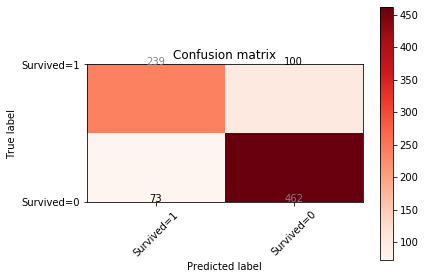

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.77      0.71      0.73       339

    accuracy                           0.80       874
   macro avg       0.79      0.78      0.79       874
weighted avg       0.80      0.80      0.80       874



In [41]:
acc_log = round(logmodel.score(Xset, y) * 100, 2)
print('Accuracy of our train data via Logistic model can be summed as: ', acc_log,'%')

Accuracy of our train data via Logistic model can be summed as:  80.21 %


* Our model predicted the survivability of the passengers with the average precision of 80% (we have been more precise on passengers who have not survived)

* Overall success of our model is satisfactory and we can move on testing our model on our train test and let's see how our model performs there

----------
<img style="float: left;" src="https://i.imgur.com/8CLs1D2.png">

### Test Data Cleaning and Organization
First, we need to import clean and organize our train dataset the exact same way we did with our train data and then we can run our model.

In [42]:
sub = pd.read_csv('gender_submission.csv')
test = pd.read_csv('titanic-test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
print('Test dataset shape:', test.shape)
print('Outcomes\' shape:', sub.shape)

Test dataset shape: (418, 11)
Outcomes' shape: (418, 2)


In [44]:
# we combine those two datasets
test_model = pd.merge(test, sub, on='PassengerId')
test_model.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [45]:
test_model.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

test_model = test_model.set_index('PassengerId')
test_model.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,0
898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,1
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,1


In [46]:
# update Sex to dummy variables; male=1 and female=1
test_model['Sex'].replace({'female':1, 'male':0}, inplace=True)
test_model.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S,1
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q,0
895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S,1


In [47]:
test_model['Age'].fillna(30, inplace=True) # replace missing values with average values
test_model['Age'].apply(np.ceil) # roung age up to the closest integer
test_model.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.363636,30.216507,0.447368,0.392344,35.627188,0.363636
std,0.841838,0.481622,12.635016,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [48]:
test_class1 = pd.get_dummies(pd.Series(list(test_model['Pclass'])), drop_first=True)
test_class1

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [49]:
test_model = test_model.reset_index()
test_model = pd.concat([test_model, test_class1], axis=1)
test_model.rename(columns={2: 'SecondClass', 3: 'ThirdClass'}, inplace=True)
test_model.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,SecondClass,ThirdClass
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S,1,0,1


In [50]:
test_model['Family'] = test_model['SibSp'] + test_model['Parch']
test_model.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_model.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,SecondClass,ThirdClass,Family
0,892,3,"Kelly, Mr. James",0,34.5,7.8292,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,S,1,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,Q,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,8.6625,S,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,S,1,0,1,2


In [51]:
test_model['Fare'] = test_model['Fare'].replace(0, np.nan)
test_model['Fare'] = test_model['Fare'].dropna(how='all', axis=0)
print((df['Fare'] == 0).sum())

test_model['lnFare'] = np.log(test_model['Fare'])
print('Shape: ', test_model.shape)
test_model.tail()

0
Shape:  (418, 12)


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,SecondClass,ThirdClass,Family,lnFare
413,1305,3,"Spector, Mr. Woolf",0,30.0,8.0500,S,0,0,1,0,2.085672
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,108.9000,C,1,0,0,0,4.690430
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,7.2500,S,0,0,1,0,1.981001
416,1308,3,"Ware, Mr. Frederick",0,30.0,8.0500,S,0,0,1,0,2.085672
417,1309,3,"Peter, Master. Michael J",0,30.0,22.3583,C,0,0,1,2,3.107198


In [52]:
test_model.dropna(inplace=True)
test_model.reset_index(drop=True, inplace=True)
print(test_model.shape)
test_model.tail()

(415, 12)


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,SecondClass,ThirdClass,Family,lnFare
410,1305,3,"Spector, Mr. Woolf",0,30.0,8.0500,S,0,0,1,0,2.085672
411,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,108.9000,C,1,0,0,0,4.690430
412,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,7.2500,S,0,0,1,0,1.981001
413,1308,3,"Ware, Mr. Frederick",0,30.0,8.0500,S,0,0,1,0,2.085672
414,1309,3,"Peter, Master. Michael J",0,30.0,22.3583,C,0,0,1,2,3.107198


----------
<img style="float: left;" src="https://i.imgur.com/4VFBdPl.png">

Now I will run the same logit model but using the data from the test dataset. We will create a list with the predicted values for the survival (survived=1; not survived=0) and then append to our test dataset for the comparison of how precise our model was on test data.

In [53]:
Xtest1 = test_model[['Sex','Age','lnFare','Family','SecondClass','ThirdClass']]
yhat1 = logmodel.predict(Xtest1)
print(yhat1.shape)
print(test_model.shape)

(415,)
(415, 12)


We convert 'yhat1' into the dataframe so we can easily append it to our test dataframe

In [54]:
yhat11 = pd.DataFrame(yhat1)
yhat11.tail()

,0
410,0
411,1
412,0
413,0
414,0


In [55]:
test_model.tail()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,SecondClass,ThirdClass,Family,lnFare
410,1305,3,"Spector, Mr. Woolf",0,30.0,8.0500,S,0,0,1,0,2.085672
411,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,108.9000,C,1,0,0,0,4.690430
412,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,7.2500,S,0,0,1,0,1.981001
413,1308,3,"Ware, Mr. Frederick",0,30.0,8.0500,S,0,0,1,0,2.085672
414,1309,3,"Peter, Master. Michael J",0,30.0,22.3583,C,0,0,1,2,3.107198


In [56]:
finalll = pd.concat([test_model, yhat11], axis=1)
finalll.rename(columns={0: 'Predicted'}, inplace=True)
finalll.tail()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,SecondClass,ThirdClass,Family,lnFare,Predicted
410,1305,3,"Spector, Mr. Woolf",0,30.0,8.0500,S,0,0,1,0,2.085672,0
411,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,108.9000,C,1,0,0,0,4.690430,1
412,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,7.2500,S,0,0,1,0,1.981001,0
413,1308,3,"Ware, Mr. Frederick",0,30.0,8.0500,S,0,0,1,0,2.085672,0
414,1309,3,"Peter, Master. Michael J",0,30.0,22.3583,C,0,0,1,2,3.107198,0


#### In order to evaluate precision of our model we'll create a function to compare our predictions with the test's survival results and convert to percentage or correct and wrong predictions

In [57]:
count = 0
wrong = 0
total = 0

for index, row in finalll.iterrows():
    if row['Survived'] == row['Predicted']:
        count += 1
        total += 1
    else:
        wrong += 1
        total += 1
        
print('correct prediction ratio:', count/ total)
print('wrong prediction ratio:', wrong / total )

correct prediction ratio: 0.9301204819277108
wrong prediction ratio: 0.06987951807228916


----------
<img style="float: left;" src="https://i.imgur.com/2zoAhUc.png">

First, I need to address the elephant in the room. It's a bit weird that I got 100% precision on predicting survivability on the train-data. Maybe I made some technical mistake, however, it can also be attributed to the neat cleaning of the data and train-set being more explicit in terms of characteristics than the train set.

Anyway, the results confirm the assumptions I made at the beginning of the project. Being female and being the passenger of the first-class massively increases the chances of surviving. Being under 10 years old also contributes to a positive outcome. However, paying higher fare doesn't necessarily mean the passenger ended in the first class, as this would have increased his or her survival chances. This can be attributed to the fact that some tickets were maybe sold in the aftermarket with higher rates. Or some tickets could have been more expansive in the different ports. For this project, I didn't go into details explaining how passengers embarking port influenced the outcome of placing him or her in a certain class or if the fare for the tickets significantly differed in those ports.

As for the model, logit regression was initially my first choice and it didn't disappoint so I didn't see the reason to try linear regression or classification. 80% succession rate on the train set can be assumed to be satisfactory, would I have gone figuring out the ages of the passengers, whose data was missing, instead of just filling them with average rate, could have increased the success rate. I was thinking of approximating age based on the title passenger name contained (for example, if it was Mrs. I bet she was more than 10. If no title maybe under 20 and so on).



-----------
> *Beka Modebadze 2019* **[LinkedIn](https://www.linkedin.com/in/bmodebadze/); [Github](https://github.com/bexxmodd)**